In [7]:
import random
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from time import perf_counter
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets, svm, metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

### Load dataset
* https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)
* https://www.kaggle.com/uciml/breast-cancer-wisconsin-data
* 0 = malignant (37%)
* 1 = benign (63%)

In [8]:
# Load the dataset
cancer = datasets.load_breast_cancer()
df = pd.DataFrame(data = cancer.data, columns=cancer.feature_names)

# Normalize the dataset
# df=(df-df.min())/(df.max()-df.min())

# Standardize the dataset
df=(df-df.mean())/df.std()
df=df-df.min()

# Standardize or normalize when axis are not symmetric in standard deviation
# Standardize over normalize when dealing with outliers

# Add the class
df['target'] = cancer.target
df_reset = df

display(df)

# Figure out how many of each class are present
# display(df['target'].value_counts())

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,3.123964,0.155776,3.251577,2.436674,4.676436,4.889349,3.764435,3.790959,4.957270,4.072029,...,0.863940,3.993448,3.220826,3.986873,4.056974,3.412354,4.037586,4.907264,3.535743,0
1,3.856076,1.873967,3.667232,3.360195,2.283113,1.122077,1.090068,1.808373,2.743096,0.950376,...,1.853160,3.225649,3.110175,2.305055,1.012543,1.158063,2.829657,1.915385,1.881374,0
2,3.606363,2.683075,3.547885,3.010678,4.050731,2.660721,2.476173,3.296150,3.680563,1.420607,...,2.198086,3.038163,2.676352,3.207280,2.524589,2.158905,3.696810,3.310302,1.801645,0
3,1.259631,2.480798,1.390593,0.689373,6.390016,5.008638,3.028106,2.711141,5.606567,6.724867,...,2.355905,1.442153,0.671810,6.071627,5.332584,3.292522,3.917402,8.199786,6.531103,0
4,3.776622,1.076485,3.757771,3.277788,3.389474,2.147587,2.483699,2.687947,2.732153,1.256309,...,0.756558,3.029235,2.440999,2.900699,1.129490,1.917322,2.472147,1.291470,1.203681,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,4.137003,2.948127,4.041733,3.794960,4.150275,1.827589,3.059465,3.579634,2.429391,0.888056,...,2.339635,3.442894,3.234877,3.058369,1.169532,1.968611,3.371248,0.800097,0.891964,0
565,3.731220,4.310590,3.597270,3.175491,3.211717,1.590903,1.806326,2.523269,2.524232,0.760584,...,4.267638,3.112562,2.714993,1.989714,1.048136,1.541048,2.476711,1.627673,0.627309,0
566,2.729531,4.271064,2.654844,2.030609,2.269604,1.570075,1.160439,1.366395,1.933299,0.923465,...,3.595684,2.270364,1.648878,1.871461,1.793036,1.631162,2.157233,1.055482,1.282302,0
567,3.864589,4.561692,3.963541,3.186857,4.633775,4.877988,4.407938,3.917239,4.877020,2.861043,...,4.457997,3.993448,2.873066,4.109506,5.344024,4.499476,4.031501,4.076456,3.818115,0


### Feature Selection:
https://www.datacamp.com/community/tutorials/feature-selection-python

In [9]:
# Feature extraction
test = SelectKBest(score_func=chi2, k=2)
fit = test.fit(df.drop('target',axis=1), df['target'])

# Summarize scores
np.set_printoptions(precision=3)
# print(fit.scores_)

features = fit.transform(df.drop('target', axis=1))
# print(features[0:1,:])
# display(df.iloc[0])

# Before normalization
# k=4 mean area, area error, worst perimeter, worst area
# k=3 mean area, area error, worst area
# k=2 mean area, worst area

# After normalization:
# k=4 mean concavity, mean concave points, worst area, worst concave points
# k=3 mean concavity, mean concave points, worst concave points
# k=2 mean concave points, worst concave points

# After standardization:
# k=4 mean concavity, mean concave points, worst area, worst concave points
# k=3 mean concavity, mean concave points, worst concave points 
# k=2 mean concavity, mean concave points

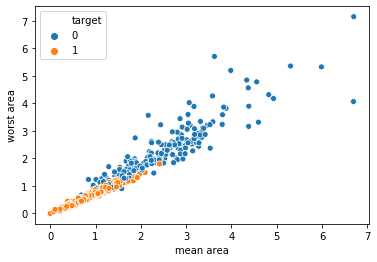

In [10]:
# Before normalization/standardization
sns.scatterplot('mean area', 'worst area', data=df, hue ='target')
# plt.savefig('Images/featureSelection_orig_meanArea-worstArea', bbox_inches='tight')

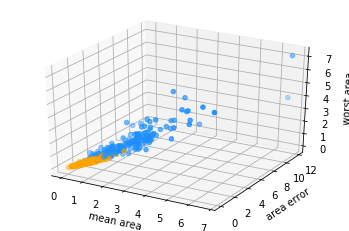

In [11]:
colors = []
for val in df['target']:
    if val == 0: colors.append('dodgerblue')
    else: colors.append('orange')

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(df['mean area'], df['area error'], df['worst area'], c=colors)
ax.set_xlabel('mean area')
ax.set_ylabel('area error')
ax.set_zlabel('worst area')
plt.show()

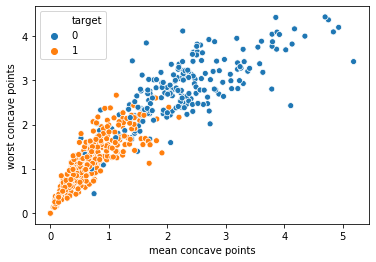

In [12]:
# After normalization
sns.scatterplot('mean concave points', 'worst concave points', data=df, hue ='target')
# plt.savefig('Images/featureSelection_norm_meanConcavePoints-worstConcavePoints', bbox_inches='tight')

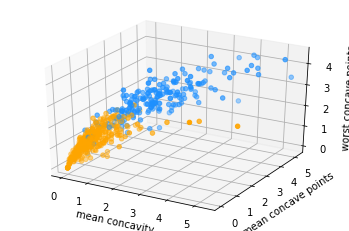

In [13]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(df['mean concavity'], df['mean concave points'], df['worst concave points'], c=colors)
ax.set_xlabel('mean concavity')
ax.set_ylabel('mean concave points')
ax.set_zlabel('worst concave points')
plt.show()

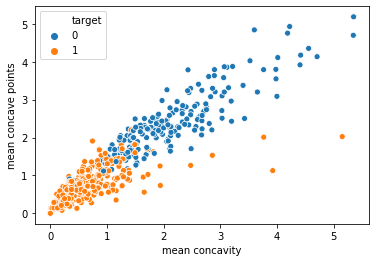

In [14]:
# After standardization
sns.scatterplot('mean concavity', 'mean concave points', data=df, hue ='target')
# plt.savefig('Images/featureSelection_std_meanConcavity-worstConcavePoints', bbox_inches='tight')

### Logistic regression

In [15]:
t1_start = perf_counter()

df = df[['mean area', 'worst area', 'target']]
# df = df[['mean concave points', 'worst concave points', 'target']]
# df = df[['mean concavity', 'mean concave points', 'target']]

d_train, d_test, t_train, t_test = train_test_split(df.drop('target',axis=1), df['target'], test_size=0.3, random_state=109)

lm = LogisticRegression()
lm.fit(d_train, t_train)
t_pred = lm.predict(d_test)

t1_end = perf_counter()

# print('Accuracy: ', metrics.accuracy_score(t_test, t_pred))
# print('Precision: ', metrics.precision_score(t_test, t_pred))
# print('Recall: ', metrics.recall_score(t_test, t_pred))
print('F1 Score: ', metrics.f1_score(t_test, t_pred))

##########################################################################################################
# Whole dataset:
# F1 Score:  0.9767441860465117

# After normalization on whole dataset:
# F1 Score:  0.9818181818181818

# After standardization on whole dataset:
# F1 Score:  0.9863013698630138
##########################################################################################################
# Mean area, worst area:
# F1 Score:  0.9680365296803655

# After normalization of mean area, worst area:
# F1 Score:  0.9113924050632911

# After standardization of mean area, worst area:
# F1 Score:  0.9636363636363636
##########################################################################################################
# Mean concave points, worst concave points:
# F1 Score:  0.8925619834710743

# After normalization of mean concave points, worst concave points:
# F1 Score:  0.9553571428571429

# After standardization of mean concave points, worst concave points:
# F1 Score:  0.9454545454545454
##########################################################################################################
# Mean concavity, mean concave points:
# F1 Score:  0.8744939271255061

# After normalization of mean concavity, mean concave points:
# F1 Score:  0.9251101321585902

# After standardization of mean concavity, mean concave points:
# F1 Score:  0.9223744292237445
##########################################################################################################

F1 Score:  0.9636363636363636


/home/walters_aj101/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


### SVM:

In [16]:
t2_start = perf_counter()

df = df[['mean area', 'worst area', 'target']]
# df = df[['mean concave points', 'worst concave points', 'target']]
# df = df[['mean concavity', 'mean concave points', 'target']]

d_train, d_test, t_train, t_test = train_test_split(df.drop('target',axis=1), df['target'], test_size=0.3, random_state=109)

clsf = svm.SVC(kernel='linear')
clsf.fit(d_train, t_train)
t_pred = clsf.predict(d_test)

t2_end = perf_counter()

# print('Accuracy: ', metrics.accuracy_score(t_test, t_pred))
# print('Precision: ', metrics.precision_score(t_test, t_pred))
# print('Recall: ', metrics.recall_score(t_test, t_pred))
print('F1 Score: ', metrics.f1_score(t_test, t_pred))

##########################################################################################################
# Whole dataset:
# F1 Score:  0.9719626168224299

# After normalization on whole dataset:
# F1 Score:  0.9863013698630138

# After standardization on whole dataset:
# F1 Score:  0.9908256880733944
##########################################################################################################
# Mean area, worst area:
# F1 Score:  0.9680365296803655

# After normalization of mean area, worst area:
# F1 Score:  0.9191489361702128

# After standardization of mean area, worst area:
# F1 Score:  0.9553571428571429
##########################################################################################################
# Mean concave points, worst concave points:
# F1 Score:  0.9310344827586207

# After normalization of mean concave points, worst concave points:
# F1 Score:  0.9596412556053812

# After standardization of mean concave points, worst concave points:
# F1 Score:  0.954954954954955
##########################################################################################################
# Mean concavity, mean concave points:
# F1 Score:  0.8870292887029289

# After normalization of mean concavity, mean concave points:
# F1 Score:  0.9327354260089685

# After standardization of mean concavity, mean concave points:
# F1 Score:  0.9266055045871558
##########################################################################################################

F1 Score:  0.9553571428571429


### Decision boundaries
Mean area vs. worst area without normalization or standardization

Text(0.5, 1.0, 'Linear SVM Decision Boundary')

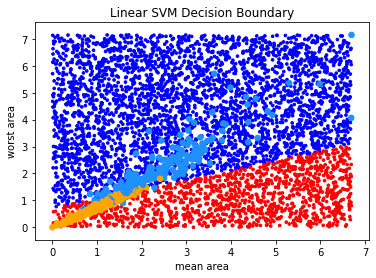

In [17]:
y = df['target']
# add random points
newx = []
newy = []
newlabel = []
for _ in range(5000):
    px = random.uniform(0,df['mean area'].max())
    py = random.uniform(0,df['worst area'].max())
    plabel = clsf.predict([[px,py]])
    newx.append(px)
    newy.append(py)
    newlabel.append(plabel)

color = ['b' if y_ == 0 else 'r' for y_ in newlabel]
plt.scatter(newx, newy, c=color, marker='o', s=7);

color = ['dodgerblue' if y_ == 0 else 'orange' for y_ in y]
plt.scatter(df['mean area'], df['worst area'], c=color, s=30, marker='o')
plt.xlabel('mean area')
plt.ylabel('worst area')
plt.title('Linear SVM Decision Boundary')
# plt.savefig('Images/decisionBoundary_SVM_linear_std_meanArea-worstArea', bbox_inches='tight')

Text(0.5, 1.0, 'LogReg Decision Boundary')

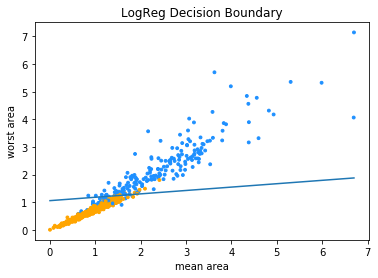

In [18]:
y = df['target']
color = ['dodgerblue' if y_ == 0 else 'orange' for y_ in y]
plt.scatter(df['mean area'], df['worst area'], c=color, s=8)

b0 = lm.intercept_[0]
b = lm.coef_[0]

Xdb = [0, df['mean area'].max()]
ydb = [-(b0+b[0]*x)/b[1] for x in Xdb]
plt.plot(Xdb, ydb)
plt.xlabel('mean area')
plt.ylabel('worst area')
plt.title('LogReg Decision Boundary')
# plt.savefig('Images/decisionBoundary_LR_line_std_meanArea-worstArea', bbox_inches='tight')

Text(0.5, 1.0, 'LogReg Decision Boundary')

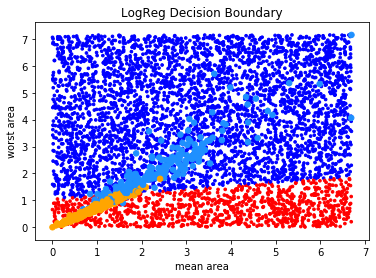

In [19]:
y = df['target']
# add random points
newx = []
newy = []
newlabel = []
for _ in range(5000):
    px = random.uniform(0,df['mean area'].max())
    py = random.uniform(0,df['worst area'].max())
    plabel = lm.predict([[px,py]])
    newx.append(px)
    newy.append(py)
    newlabel.append(plabel)

color = ['b' if y_ == 0 else 'r' for y_ in newlabel]
plt.scatter(newx, newy, c=color, marker='o', s=7);

color = ['dodgerblue' if y_ == 0 else 'orange' for y_ in y]
plt.scatter(df['mean area'], df['worst area'], c=color, s=30, marker='o')
plt.xlabel('mean area')
plt.ylabel('worst area')
plt.title('LogReg Decision Boundary')
# plt.savefig('Images/decisionBoundary_LR_scatter_std_meanArea-worstArea', bbox_inches='tight')

### Generalization

Text(0, 0.5, 'F1 scores')

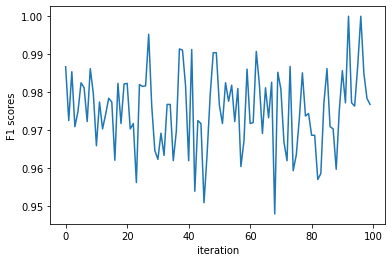

In [20]:
df = df_reset
# df = df[['mean area', 'worst area', 'target']]
iterations = []
fscores = []
# fscores.clear()

for i in range(100):
    d_train, d_test, t_train, t_test = train_test_split(df.drop('target',axis=1), df['target'], test_size=0.3)

    clsf = svm.SVC(kernel='linear')
    clsf.fit(d_train, t_train)
    t_pred = clsf.predict(d_test)
    iterations.append(i)
    fscores.append(metrics.f1_score(t_test, t_pred))

sns.lineplot(iterations, fscores)
plt.xlabel('iteration')
plt.ylabel('F1 scores')
# plt.savefig('Images/generalize_SVM_30pHO_100x_random_wholeDF_std', bbox_inches='tight')

### Linear vs Polynomial vs RBF SVM

0.9553571428571429


Text(0.5, 1.0, 'Linear SVM Decision Boundary')

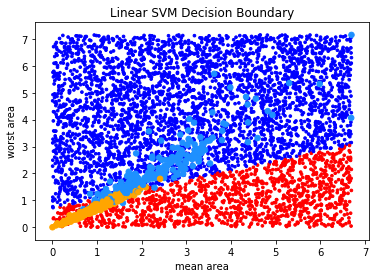

In [21]:
# fscores = []
fscores.clear()
df = df[['mean area', 'worst area', 'target']]

d_train, d_test, t_train, t_test = train_test_split(df.drop('target',axis=1), df['target'], test_size=0.3, random_state=109)

clsf = svm.SVC(kernel='linear')
clsf.fit(d_train, t_train)
t_pred = clsf.predict(d_test)
fscores.append(metrics.f1_score(t_test, t_pred))
print(metrics.f1_score(t_test, t_pred))

y = df['target']
# add random points
newx = []
newy = []
newlabel = []
for _ in range(5000):
    px = random.uniform(0,df['mean area'].max())
    py = random.uniform(0,df['worst area'].max())
    plabel = clsf.predict([[px,py]])
    newx.append(px)
    newy.append(py)
    newlabel.append(plabel)

color = ['b' if y_ == 0 else 'r' for y_ in newlabel]
plt.scatter(newx, newy, c=color, marker='o', s=7);

color = ['dodgerblue' if y_ == 0 else 'orange' for y_ in y]
plt.scatter(df['mean area'], df['worst area'], c=color, s=30, marker='o')
plt.xlabel('mean area')
plt.ylabel('worst area')
plt.title('Linear SVM Decision Boundary')
# plt.savefig('Images/decisionBoundary_SVM_linear_std_meanArea-worstArea', bbox_inches='tight')

/home/walters_aj101/.local/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.951111111111111


Text(0.5, 1.0, 'Poly(4) SVM Decision Boundary')

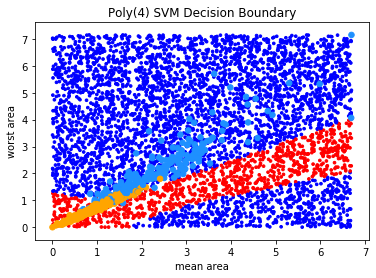

In [22]:
d_train, d_test, t_train, t_test = train_test_split(df.drop('target',axis=1), df['target'], test_size=0.3, random_state=109)

clsf = svm.SVC(kernel='poly', degree=4)
clsf.fit(d_train, t_train)
t_pred = clsf.predict(d_test)
fscores.append(metrics.f1_score(t_test, t_pred))
print(metrics.f1_score(t_test, t_pred))

y = df['target']
# add random points
newx = []
newy = []
newlabel = []
for _ in range(5000):
    px = random.uniform(0,df['mean area'].max())
    py = random.uniform(0,df['worst area'].max())
    plabel = clsf.predict([[px,py]])
    newx.append(px)
    newy.append(py)
    newlabel.append(plabel)

color = ['b' if y_ == 0 else 'r' for y_ in newlabel]
plt.scatter(newx, newy, c=color, marker='o', s=7);

color = ['dodgerblue' if y_ == 0 else 'orange' for y_ in y]
plt.scatter(df['mean area'], df['worst area'], c=color, s=30, marker='o')
plt.xlabel('mean area')
plt.ylabel('worst area')
plt.title('Poly(4) SVM Decision Boundary')
# plt.savefig('Images/decisionBoundary_SVM_poly4_std_meanArea-worstArea', bbox_inches='tight')

/home/walters_aj101/.local/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.9600000000000001


Text(0.5, 1.0, 'RBF SVM Decision Boundary')

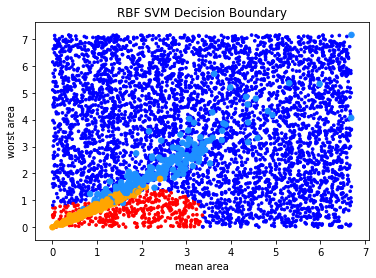

In [23]:
d_train, d_test, t_train, t_test = train_test_split(df.drop('target',axis=1), df['target'], test_size=0.3, random_state=109)

clsf = svm.SVC(kernel='rbf')
clsf.fit(d_train, t_train)
t_pred = clsf.predict(d_test)
fscores.append(metrics.f1_score(t_test, t_pred))
print(metrics.f1_score(t_test, t_pred))

y = df['target']
# add random points
newx = []
newy = []
newlabel = []
for _ in range(5000):
    px = random.uniform(0,df['mean area'].max())
    py = random.uniform(0,df['worst area'].max())
    plabel = clsf.predict([[px,py]])
    newx.append(px)
    newy.append(py)
    newlabel.append(plabel)

color = ['b' if y_ == 0 else 'r' for y_ in newlabel]
plt.scatter(newx, newy, c=color, marker='o', s=7);

color = ['dodgerblue' if y_ == 0 else 'orange' for y_ in y]
plt.scatter(df['mean area'], df['worst area'], c=color, s=30, marker='o')
plt.xlabel('mean area')
plt.ylabel('worst area')
plt.title('RBF SVM Decision Boundary')
# plt.savefig('Images/decisionBoundary_SVM_RBF_std_meanArea-worstArea', bbox_inches='tight')

In [24]:
print(fscores)
# Fscores: 0.9553571428571429, 0.9639639639639639, 0.9600000000000001

[0.9553571428571429, 0.951111111111111, 0.9600000000000001]


### Change class_weight on SVM

Text(0.5, 1.0, 'Class weight vs. F1 score')

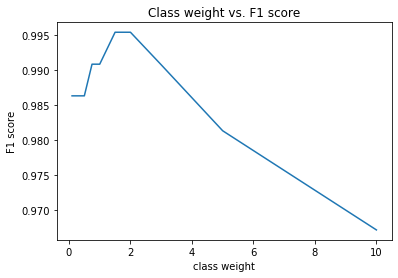

In [25]:
df = df_reset
# fscores = []
fscores.clear()
weights = [0.1, 0.25, 0.5, 0.75, 1, 1.5, 2, 3, 5, 10]

for wt in weights:
    cw = dict({0:wt})
    d_train, d_test, t_train, t_test = train_test_split(df.drop('target',axis=1), df['target'], test_size=0.3, random_state=109)
    clsf = svm.SVC(kernel='linear', class_weight=cw)
    clsf.fit(d_train, t_train)
    t_pred = clsf.predict(d_test)
    fscores.append(metrics.f1_score(t_test, t_pred))
    
sns.lineplot(weights, fscores)
plt.xlabel('class weight')
plt.ylabel('F1 score')
plt.title('Class weight vs. F1 score')
# plt.savefig('Images/classWeight_SVM_30pHO_RangeOfWeights_wholeDF_std', bbox_inches='tight')

### Is there a difference in runtime performance?

In [26]:
print('Logistic regression runtime: ', t1_end - t1_start)
print('SVM runtime: ', t2_end - t2_start)
print('LogReg/SVM runtime: ', (t1_end - t1_start)/(t2_end - t2_start))

# Round 0: 0.7725
# Round 1: 0.7630
# Round 2: 1.2231
# Round 3: 0.8523
# Round 4: 1.1898
# Round 5: 1.1575
# Round 6: 0.7772
# Round 7: 1.5060
# Round 8: 1.0437
# Round 9: 0.8562

print(np.mean([0.7725, 0.7630, 1.2231, 0.8523, 1.1898, 1.1575, 0.7772, 1.5060, 1.0437, 0.8562]))
# Mean: 1.0141

Logistic regression runtime:  0.016875474000698887
SVM runtime:  0.006182486002217047
LogReg/SVM runtime:  2.729561214477044
1.0141299999999998
